## Classification of MNIST dataset with tensor networks

In [1]:
# import packages here
# --------------------------------------
import matplotlib.pyplot as plt

import qtealeaves as qtl
from qtealeaves.convergence_parameters.conv_params import TNConvergenceParameters
from qtealeaves.emulator.mps_simulator import MPS
from qtealeaves.emulator import StateVector

from tensorflow.keras.datasets import mnist
import numpy as np


/Users/samuelepedrielli/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


### Load MNIST dataset

In [2]:
# Load dataset here
# --------------------------------------
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
print(x_test.shape)


(60000, 28, 28)
(10000, 28, 28)


In [3]:
# Selecting only images with the numbers 3 and 8
train_filter = np.where((y_train == 3 ) | (y_train == 8))
test_filter = np.where((y_test == 3) | (y_test == 8))

x_train, y_train = x_train[train_filter], y_train[train_filter]
x_test, y_test = x_test[test_filter], y_test[test_filter]

train_idxs_3 = np.where(y_train == 3)
train_idxs_8 = np.where(y_train == 8)
test_idxs_3 = np.where(y_test == 3)
test_idxs_8 = np.where(y_test == 8)

y_train[train_idxs_3] = 0
y_train[train_idxs_8] = 1
y_test[test_idxs_3] = 0
y_test[test_idxs_8] = 1

# Reduce amount of images
nr_images = 500

x_train, y_train, x_test, y_test = x_train[:nr_images, :, :], y_train[:nr_images], x_test[:nr_images, :, :], y_test[:nr_images]

x_train = x_train / 255
x_test = x_test / 255

0


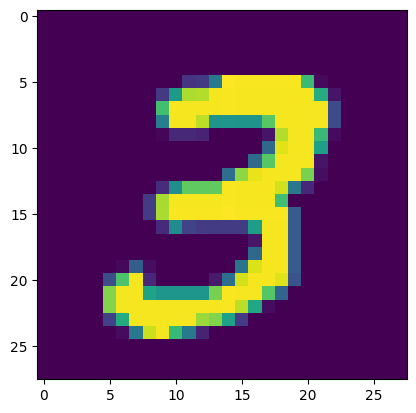

In [4]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0, :, :])
print(y_train[0])

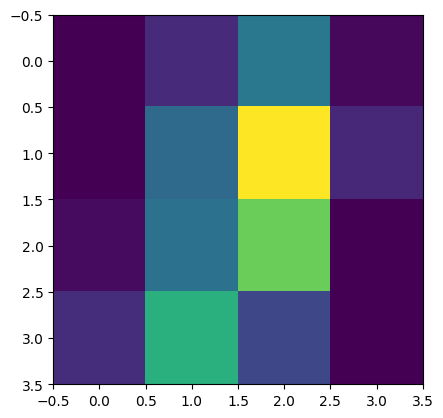

In [5]:
import skimage.measure

x_train = skimage.measure.block_reduce(x_train, (1,7, 7), np.mean)
x_test = skimage.measure.block_reduce(x_test, (1,7,7), np.mean)

plt.imshow(x_train[0, :, :])

In [6]:
x = np.random.rand(100, 100)

In [7]:
import tensorflow as tf

test = (x_test, y_test)

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(4, 4)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(1)
])
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.BinaryAccuracy()],
)

model.fit(x_train, y_train, epochs=100,validation_data=test,
)

Epoch 1/100


/Users/samuelepedrielli/Library/Python/3.9/lib/python/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - binary_accuracy: 0.5276 - loss: 0.6804 - val_binary_accuracy: 0.5140 - val_loss: 0.6646
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.5139 - loss: 0.6514 - val_binary_accuracy: 0.5140 - val_loss: 0.6427
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.5214 - loss: 0.6193 - val_binary_accuracy: 0.5160 - val_loss: 0.6205
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_accuracy: 0.5534 - loss: 0.5892 - val_binary_accuracy: 0.5320 - val_loss: 0.5950
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.6074 - loss: 0.5600 - val_binary_accuracy: 0.5440 - val_loss: 0.5715
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.6453 - loss: 0.5364 - val_binary_accuracy: 0.5900 - val_loss: 0.5412
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.6999 - loss: 0.5014 - val_binary_accuracy: 0.6160 - val_loss: 0.5138
Epoch 8/100
16/16 ━━━━━━━

In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         2,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,917 (27.02 KB)

 Trainable params: 2,305 (9.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,612 (18.02 KB)

In [12]:
w = np.array(model.weights[0])

w.shape

(16, 128)

## SVD direttamente sulla matrice dei pesi

Singular values: [14.515522   3.4528549  2.1539013  1.9590404  1.6370094  1.510328
  1.4944794  1.439355   1.3788594  1.2284942  1.1853667  1.1666235
  1.1050391  1.0566664  1.0079014  0.9280413]
Singular value matrix shape: (16,)
-----------------------------------
Left singular vectors (U) shape: (16, 16)
-----------------------------------
Right singular vectors (V^T) shape: (128, 128)


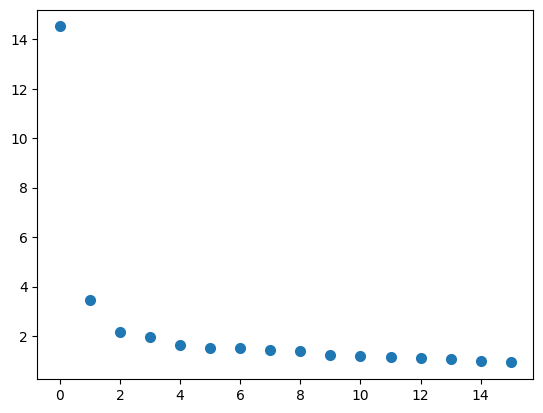

In [25]:
import tensorflow as tf
s, u, v = tf.linalg.svd(w, full_matrices = True)

# Print singular values
print("Singular values:", s.numpy())
print("Singular value matrix shape:", s.shape)

print("-----------------------------------")
# Print left singular vectors
#print("Left singular vectors (U):", u.numpy())
print("Left singular vectors (U) shape:", u.shape)

print("-----------------------------------")

# Print right singular vectors (V^T)
#print("Right singular vectors (V^T):", v.numpy())
print("Right singular vectors (V^T) shape:", v.shape)

#print("-----------------------------------")
x_array = np.arange(len(s.numpy()))
plt.scatter(x_array, s.numpy(), lw = 2)

# 

In [31]:
# Number of singular values to keep
k = 1

# Truncate the singular values and singular vectors
s_truncated = s[:k]
u_truncated = u[:, :k]
v_truncated = v[:, :k]

sigma_truncated = tf.linalg.diag(s_truncated)
w_truncated = tf.matmul(u_truncated, tf.matmul(sigma_truncated, tf.transpose(v_truncated)))

w_truncated.numpy().shape

(16, 128)

In [32]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(4, 4)),
    tf.keras.layers.Dense(128, kernel_initializer = tf.keras.initializers.Constant(w_truncated), activation='relu'),
    tf.keras.layers.Dense(1)
])

model.fit(x_train, y_train, epochs=100,validation_data=test,
)

/Users/samuelepedrielli/Library/Python/3.9/lib/python/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


ValueError: You must call `compile()` before using the model.